# Hierarchical Clustering
### Validation with Dendogram and Heatmap

Created by Andres Segura-Tinoco  
Created on Apr 20, 2021

In [ ]:
# Import libraries
import numpy as np
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [ ]:
# Plot libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

## <span>1. Load Iris data</span>

In [ ]:
# Load the IRIS dataset
iris = datasets.load_iris()

# Preprocessing data
X = iris.data
y = iris.target
n_data = len(X)
delta = 0.3
x_min, x_max = X[:, 0].min() - delta, X[:, 0].max() + delta
y_min, y_max = X[:, 1].min() - delta, X[:, 1].max() + delta

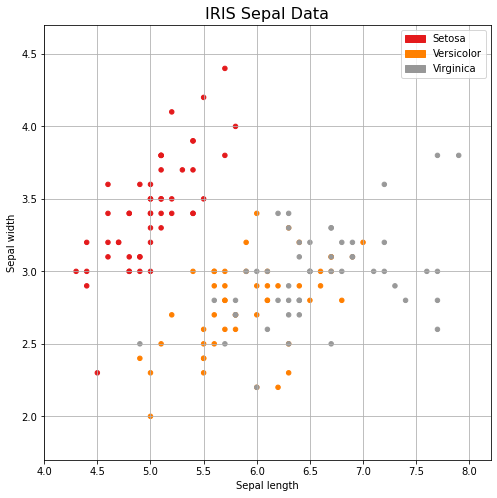

In [ ]:
# Plot the training points
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("IRIS Sepal Data", fontsize=16)
op1 = mpatches.Patch(color='#E41A1C', label='Setosa')
op2 = mpatches.Patch(color='#FF8000', label='Versicolor')
op3 = mpatches.Patch(color='#979797', label='Virginica')
plt.legend(handles=[op1, op2, op3], loc='best')
ax.grid()
plt.show()

## <span>2. Hierarchical Agglomerative Clustering</span>
Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering" target="_blank">[wikipedia]</a>.

### 2.1. Dendogram to Select Optimal Clusters

In [ ]:
# Calculate average linkage
linkage_method = 'average'
linked = linkage(X, linkage_method)
labelList = range(1, n_data+1)

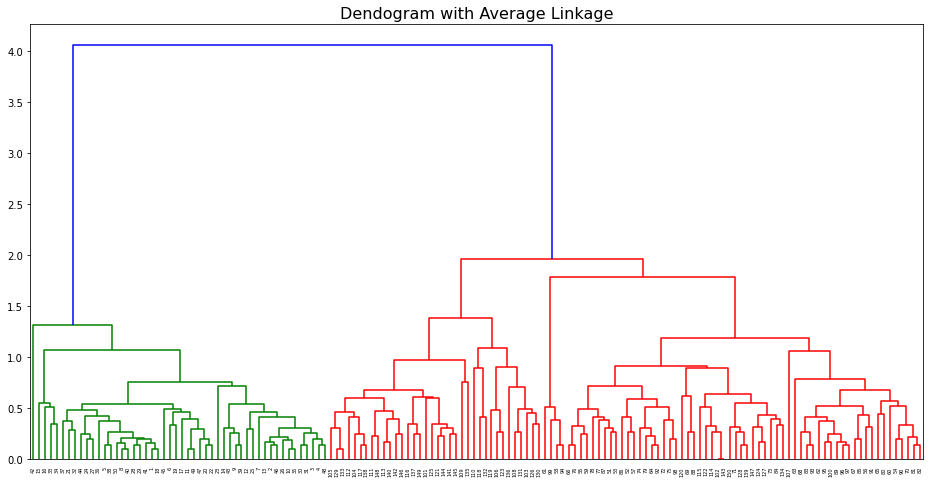

In [ ]:
# Plot Dendogram
plt.figure(figsize=(16, 8))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendogram with " + linkage_method.title() + " Linkage", fontsize=16)
plt.show()

Clearly, with Hierarchical Clustering with average linkage, the optimal number of clusters is 2.

### 2.2. Hierarchical Clustering with Optimal k

In [ ]:
# Optimal number of clusters 
k = 2

In [ ]:
# Apply Hierarchical Agglomerative Clustering
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=linkage_method)
cluster = hac.fit_predict(X)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

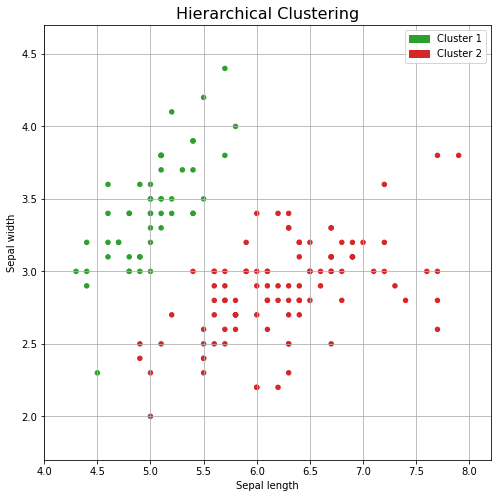

In [ ]:
# Plotting clustering
fig, ax = plt.subplots(figsize=(8, 8))
colormap = np.array(["#d62728", "#2ca02c"])
plt.scatter(X[:, 0], X[:, 1], c=colormap[cluster], s=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("Hierarchical Clustering", fontsize=16)
op1 = mpatches.Patch(color=colormap[1], label='Cluster 1')
op2 = mpatches.Patch(color=colormap[0], label='Cluster 2')
plt.legend(handles=[op1, op2], loc='best')
ax.grid()
plt.show()

### 2.3. Hierarchical Clustering Heatmap

In [ ]:
# Calculate distance matrix with Euclidean distance
D = np.zeros([n_data, n_data])
for i in range(n_data):
  for j in range(n_data):
    D[i, j] = np.linalg.norm(X[i] - X[j])

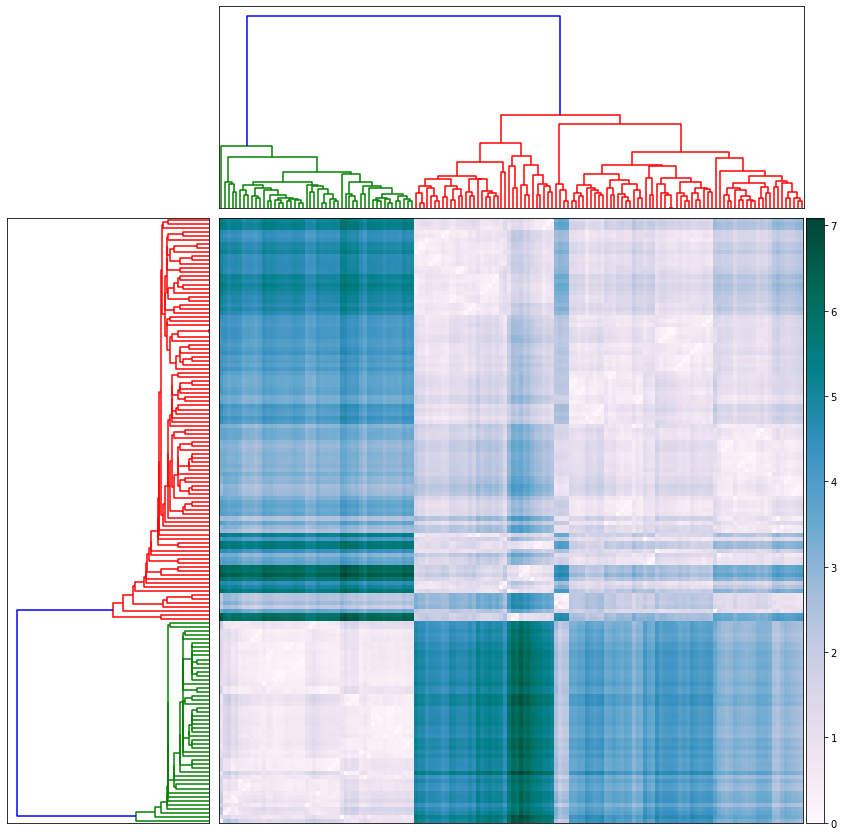

In [ ]:
# Dendrogram that comes to the left
fig = plt.figure(figsize=(14, 14))

# Add left axes with hierarchical cluster
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y = sch.linkage(X, method='single')
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])

# Add top axes with hierarchical cluster
ax2 = fig.add_axes([0.3, 0.71, 0.58, 0.2])
Y = sch.linkage(X, method=linkage_method)
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Main heat-map
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1, :]
D = D[:, idx2]

# The actual heat-map
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap="PuBuGn")

divider = make_axes_locatable(axmatrix)
cax = divider.append_axes("right", size="3%", pad=0.05)
plt.colorbar(im, cax=cax)

axmatrix.set_xticks([])
axmatrix.set_yticks([])

plt.show()

<hr>
You can contact me on <a href="https://twitter.com/SeguraAndres7" target="_blank">Twitter</a> | <a href="https://github.com/ansegura7/" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/andres-segura-tinoco/" target="_blank">LinkedIn</a>